<h1>Predictions from individual features</h1>

In [2]:
# Functional imports
import os 
import numpy as np

from nibabel import load as load_mask
from sklearn import model_selection

from data_prep_helpers import make_vol
from encoding_helpers import get_feature_predictions
from plotting_helpers import plot_lateral_only, plot_lateral_only_with_vmax, plot_surfaces, plot_surfaces_with_vmax

# Notebook specific imports
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
%autosave 5

Autosaving every 5 seconds


<h2>Setup</h2>

In [3]:
# Set data location
directory = os.path.join(os.path.expanduser('~'), 'Documents', 'Data')
group_mask = load_mask(os.path.join(directory, 'group_gm_mask.nii.gz'))

print('Data location:', directory)
print('Mask shape:', np.shape(group_mask))

Data location: /Users/angira/Documents/Data
Mask shape: (79, 95, 68)


In [4]:
# Load BOLD data
bold_34yrs = np.load(os.path.join(directory, '3-4-yrs', '3-4-yrs_normalized_data_gm_mask.npy'))
print('3-4 year old BOLD data:', np.shape(bold_34yrs))

bold_5yrs = np.load(os.path.join(directory, '5-yrs', '5-yrs_normalized_data_gm_mask.npy'))
print('5 year old BOLD data:', np.shape(bold_5yrs))

bold_7yrs = np.load(os.path.join(directory, '7-yrs', '7-yrs_normalized_data_gm_mask.npy'))
print('7 year old BOLD data:', np.shape(bold_7yrs))

bold_812yrs = np.load(os.path.join(directory, '8-12-yrs', '8-12-yrs_normalized_data_gm_mask.npy'))
print('8-12 year old BOLD data:', np.shape(bold_812yrs))

bold_adults = np.load(os.path.join(directory, 'adults', 'adults_normalized_data_gm_mask.npy'))
print('Adult BOLD data:', np.shape(bold_adults))

3-4 year old BOLD data: (31, 367709, 152)
5 year old BOLD data: (31, 367709, 152)
7 year old BOLD data: (23, 367709, 152)
8-12 year old BOLD data: (34, 367709, 152)
Adult BOLD data: (33, 367709, 152)


In [6]:
# Load weights
weights_34yrs = np.load(os.path.join(directory, 
                                      '3-4-yrs', 
                                      'encoding_results', 
                                      'unthresholded', 
                                      '3-4-yrs_weights_gm_mask.npy'))
print('3-4 year old model weights:', np.shape(weights_34yrs))

weights_5yrs = np.load(os.path.join(directory, 
                                      '5-yrs', 
                                      'encoding_results', 
                                      'unthresholded', 
                                      '5-yrs_weights_gm_mask.npy'))
print('5 year old model weights:', np.shape(weights_5yrs))

weights_7yrs = np.load(os.path.join(directory, 
                                      '7-yrs', 
                                      'encoding_results', 
                                      'unthresholded', 
                                      '7-yrs_weights_gm_mask.npy'))
print('7 year old model weights:', np.shape(weights_7yrs))

weights_812yrs = np.load(os.path.join(directory, 
                                      '8-12-yrs', 
                                      'encoding_results', 
                                      'unthresholded', 
                                      '8-12-yrs_weights_gm_mask.npy'))
print('8-12 year old model weights:', np.shape(weights_812yrs))

weights_adults = np.load(os.path.join(directory, 
                                      'adults', 
                                      'encoding_results', 
                                      'unthresholded', 
                                      'adults_weights_gm_mask.npy'))
print('Adult model weights:', np.shape(weights_adults))

3-4 year old model weights: (31, 24, 367709)
5 year old model weights: (31, 24, 367709)
7 year old model weights: (23, 24, 367709)
8-12 year old model weights: (34, 24, 367709)
Adult model weights: (33, 24, 367709)


In [7]:
# Load features

social_features = np.load(os.path.join(directory, 'features', 'social_normalized.npy'))
moten_features = np.load(os.path.join(directory, 'features', 'moten_reduced19.npy'))
combined_features = np.concatenate((social_features, moten_features), axis=1)

# Split features
combined_train, combined_test = model_selection.train_test_split(combined_features, test_size=0.2, random_state=4)

print('Combined features test:', np.shape(combined_test))

Combined features test: (31, 24)


<h2>Social interaction</h2>

In [8]:
# 3-4 years
interaction_predictions_34yrs = get_feature_predictions(bold_data=bold_34yrs, 
                                                       weights=weights_34yrs, 
                                                       features_test=combined_test, 
                                                       feature_index=1)
print('3-4 year old interaction predictions:', np.shape(interaction_predictions_34yrs))

3-4 year old interaction predictions: (31, 367709)


In [9]:
# 5 years
interaction_predictions_5yrs = get_feature_predictions(bold_data=bold_5yrs, 
                                                       weights=weights_5yrs, 
                                                       features_test=combined_test, 
                                                       feature_index=1)
print('5 year old interaction predictions:', np.shape(interaction_predictions_5yrs))

5 year old interaction predictions: (31, 367709)


In [10]:
# 7 years
interaction_predictions_7yrs = get_feature_predictions(bold_data=bold_7yrs, 
                                                       weights=weights_7yrs, 
                                                       features_test=combined_test, 
                                                       feature_index=1)
print('7 year old interaction predictions:', np.shape(interaction_predictions_7yrs))

7 year old interaction predictions: (23, 367709)


In [11]:
# 8-12 years
interaction_predictions_812yrs = get_feature_predictions(bold_data=bold_812yrs, 
                                                       weights=weights_812yrs, 
                                                       features_test=combined_test, 
                                                       feature_index=1)
print('8-12 year old interaction predictions:', np.shape(interaction_predictions_812yrs))

8-12 year old interaction predictions: (34, 367709)


In [13]:
# Adults
interaction_predictions_adults = get_feature_predictions(bold_data=bold_adults, 
                                                         weights=weights_adults, 
                                                         features_test=combined_test, 
                                                         feature_index=1)
print('Adult interaction predictions:', np.shape(interaction_predictions_adults))

Adult interaction predictions: (33, 367709)


In [14]:
# Safety save

np.save(os.path.join(directory, '3-4-yrs', 'encoding_results', '3-4-yrs_interaction_predictions.npy'), 
        interaction_predictions_34yrs)

np.save(os.path.join(directory, '5-yrs', 'encoding_results', '5-yrs_interaction_predictions.npy'), 
        interaction_predictions_5yrs)

np.save(os.path.join(directory, '7-yrs', 'encoding_results', '7-yrs_interaction_predictions.npy'), 
        interaction_predictions_7yrs)

np.save(os.path.join(directory, '8-12-yrs', 'encoding_results', '8-12-yrs_interaction_predictions.npy'), 
        interaction_predictions_812yrs)

np.save(os.path.join(directory, 'adults', 'encoding_results', 'adults_interaction_predictions.npy'), 
        interaction_predictions_adults)

print('Saved successfully')

Saved successfully


<h2>ToM</h2>

In [15]:
# 3-4 years
tom_predictions_34yrs = get_feature_predictions(bold_data=bold_34yrs, 
                                               weights=weights_34yrs, 
                                               features_test=combined_test, 
                                               feature_index=2)
print('3-4 year old ToM predictions:', np.shape(tom_predictions_34yrs))

3-4 year old ToM predictions: (31, 367709)


In [16]:
# 5 years
tom_predictions_5yrs = get_feature_predictions(bold_data=bold_5yrs, 
                                               weights=weights_5yrs, 
                                               features_test=combined_test, 
                                               feature_index=2)
print('5 year old ToM predictions:', np.shape(tom_predictions_5yrs))

5 year old ToM predictions: (31, 367709)


In [17]:
# 7 years
tom_predictions_7yrs = get_feature_predictions(bold_data=bold_7yrs, 
                                               weights=weights_7yrs, 
                                               features_test=combined_test, 
                                               feature_index=2)
print('7 year old ToM predictions:', np.shape(tom_predictions_7yrs))

7 year old ToM predictions: (23, 367709)


In [18]:
# 8-12 years
tom_predictions_812yrs = get_feature_predictions(bold_data=bold_812yrs, 
                                                weights=weights_812yrs, 
                                                features_test=combined_test, 
                                                feature_index=2)
print('8-12 year old ToM predictions:', np.shape(tom_predictions_812yrs))

8-12 year old ToM predictions: (34, 367709)


In [19]:
# Adults
tom_predictions_adults = get_feature_predictions(bold_data=bold_adults, 
                                                 weights=weights_adults, 
                                                 features_test=combined_test, 
                                                 feature_index=2)
print('Adult ToM predictions:', np.shape(tom_predictions_adults))

Adult ToM predictions: (33, 367709)


In [20]:
# Safety save

np.save(os.path.join(directory, '3-4-yrs', 'encoding_results', '3-4-yrs_tom_predictions.npy'), 
        tom_predictions_34yrs)

np.save(os.path.join(directory, '5-yrs', 'encoding_results', '5-yrs_tom_predictions.npy'), 
        tom_predictions_5yrs)

np.save(os.path.join(directory, '7-yrs', 'encoding_results', '7-yrs_tom_predictions.npy'), 
        tom_predictions_7yrs)

np.save(os.path.join(directory, '8-12-yrs', 'encoding_results', '8-12-yrs_tom_predictions.npy'), 
        tom_predictions_812yrs)

np.save(os.path.join(directory, 'adults', 'encoding_results', 'adults_tom_predictions.npy'), 
        tom_predictions_adults)

print('Saved successfully')

Saved successfully


<h2>Faces</h2>

In [21]:
# 3-4 years
faces_predictions_34yrs = get_feature_predictions(bold_data=bold_34yrs, 
                                                 weights=weights_34yrs, 
                                                 features_test=combined_test, 
                                                 feature_index=0)
print('3-4 year old faces predictions:', np.shape(faces_predictions_34yrs))

3-4 year old faces predictions: (31, 367709)


In [22]:
# 5 years
faces_predictions_5yrs = get_feature_predictions(bold_data=bold_5yrs, 
                                                 weights=weights_5yrs, 
                                                 features_test=combined_test, 
                                                 feature_index=0)
print('5 year old faces predictions:', np.shape(faces_predictions_5yrs))

5 year old faces predictions: (31, 367709)


In [23]:
# 7 years
faces_predictions_7yrs = get_feature_predictions(bold_data=bold_7yrs, 
                                                 weights=weights_7yrs, 
                                                 features_test=combined_test, 
                                                 feature_index=0)
print('7 year old faces predictions:', np.shape(faces_predictions_7yrs))

7 year old faces predictions: (23, 367709)


In [24]:
# 8-12 years
faces_predictions_812yrs = get_feature_predictions(bold_data=bold_812yrs, 
                                                weights=weights_812yrs, 
                                                features_test=combined_test, 
                                                feature_index=0)
print('8-12 year old faces predictions:', np.shape(faces_predictions_812yrs))

8-12 year old faces predictions: (34, 367709)


In [25]:
# Adults
faces_predictions_adults = get_feature_predictions(bold_data=bold_adults, 
                                                   weights=weights_adults, 
                                                   features_test=combined_test, 
                                                   feature_index=0)
print('Adult faces predictions:', np.shape(faces_predictions_adults))

Adult faces predictions: (33, 367709)


In [26]:
# Safety save

np.save(os.path.join(directory, '3-4-yrs', 'encoding_results', '3-4-yrs_faces_only_scores.npy'), 
        faces_predictions_34yrs)

np.save(os.path.join(directory, '5-yrs', 'encoding_results', '5-yrs_faces_only_scores.npy'), 
        faces_predictions_5yrs)

np.save(os.path.join(directory, '7-yrs', 'encoding_results', '7-yrs_faces_only_scores.npy'), 
        faces_predictions_7yrs)

np.save(os.path.join(directory, '8-12-yrs', 'encoding_results', '8-12-yrs_faces_ponly_scores.npy'), 
        faces_predictions_812yrs)

np.save(os.path.join(directory, 'adults', 'encoding_results', 'adults_faces_only_scores.npy'), 
        faces_predictions_adults)

<h2>Plots</h2>

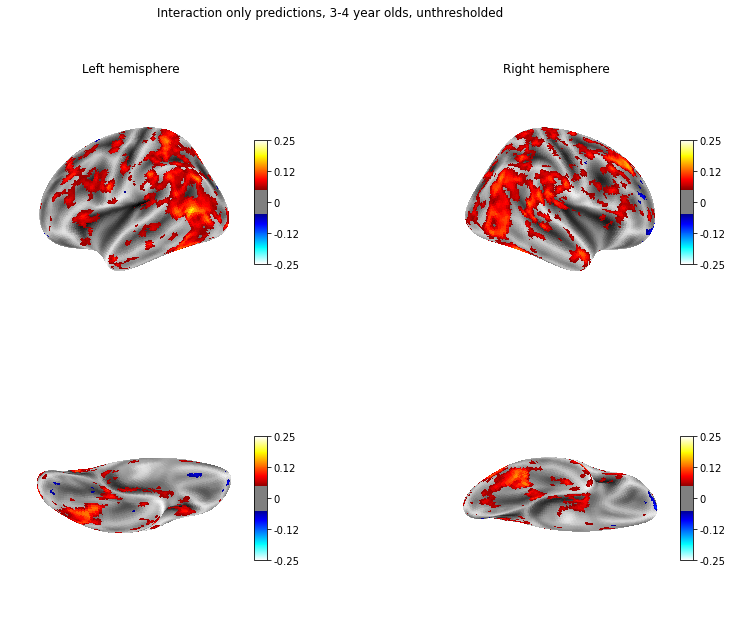

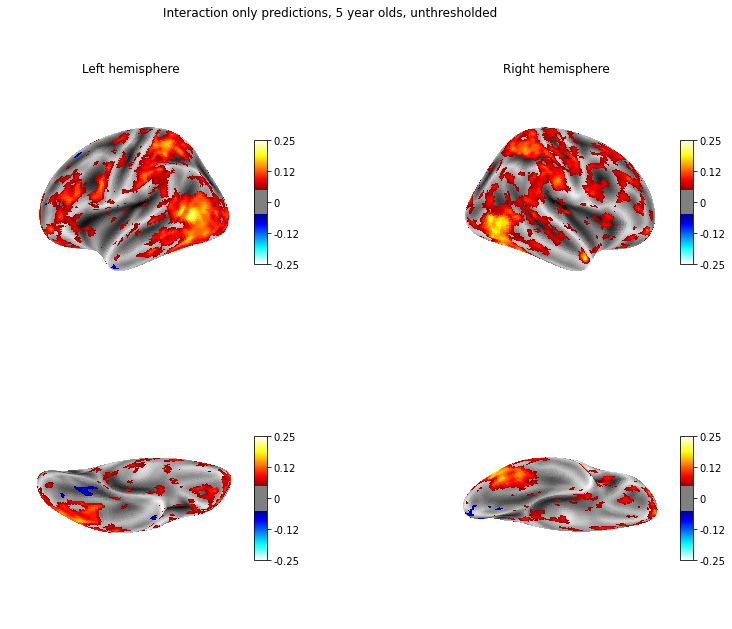

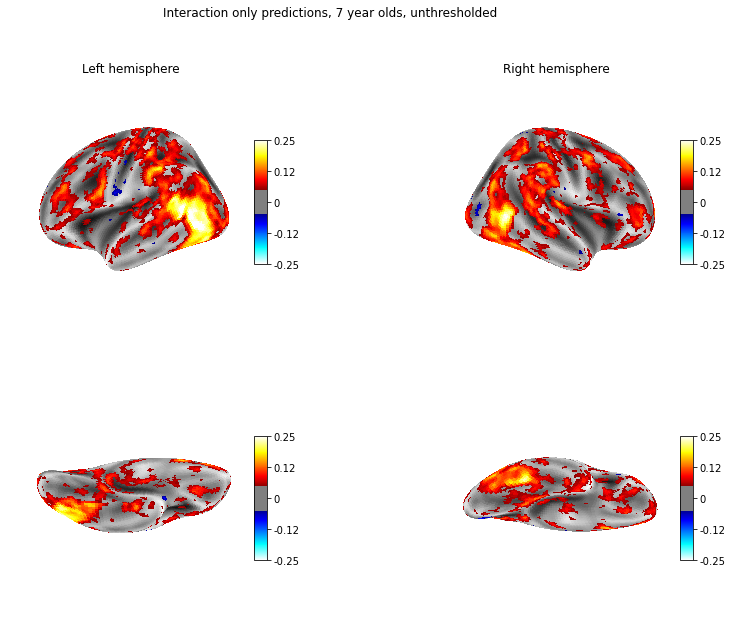

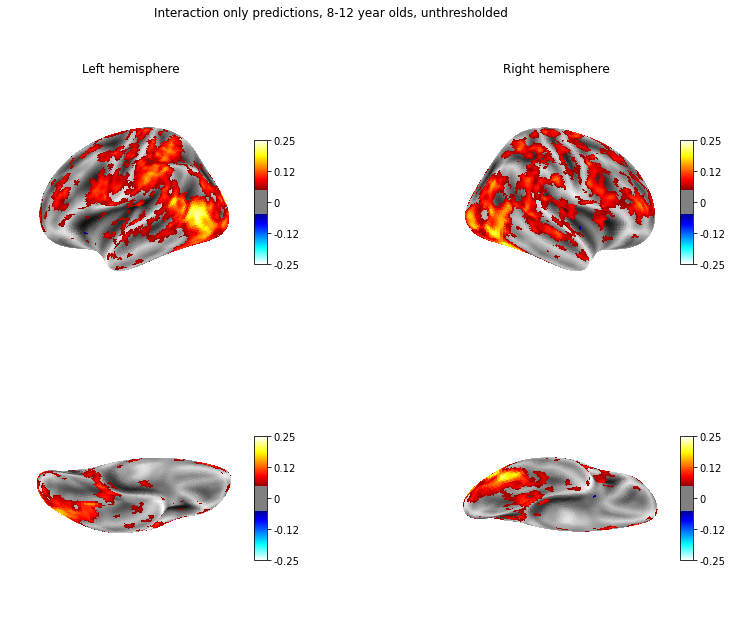

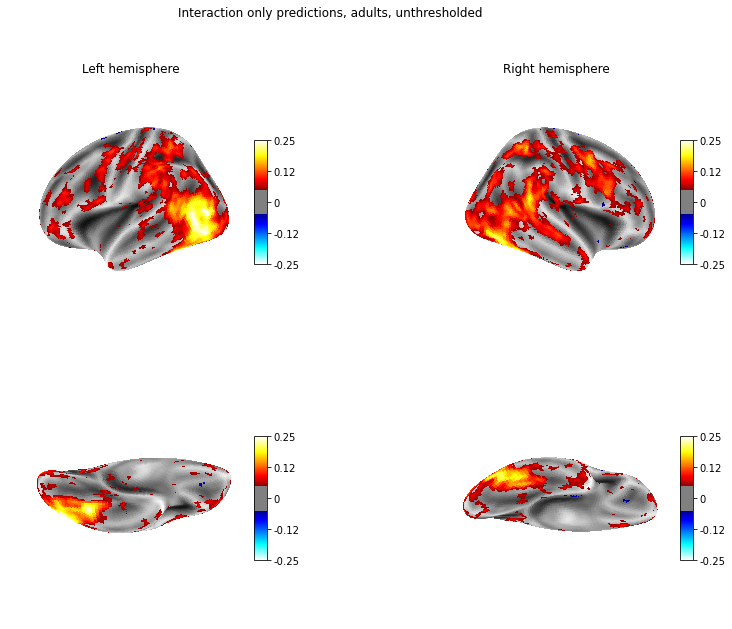

In [28]:
plot_surfaces_with_vmax(vol=make_vol(np.mean(interaction_predictions_34yrs, axis=0), group_mask),
                 title='Interaction only predictions, 3-4 year olds, unthresholded', 
                 vis_threshold=0.05, vmax=0.25)

plot_surfaces_with_vmax(vol=make_vol(np.mean(interaction_predictions_5yrs, axis=0), group_mask),
                 title='Interaction only predictions, 5 year olds, unthresholded', 
                 vis_threshold=0.05, vmax=0.25)

plot_surfaces_with_vmax(vol=make_vol(np.mean(interaction_predictions_7yrs, axis=0), group_mask),
                 title='Interaction only predictions, 7 year olds, unthresholded', 
                 vis_threshold=0.05, vmax=0.25)

plot_surfaces_with_vmax(vol=make_vol(np.mean(interaction_predictions_812yrs, axis=0), group_mask),
                 title='Interaction only predictions, 8-12 year olds, unthresholded', 
                 vis_threshold=0.05, vmax=0.25)

plot_surfaces_with_vmax(vol=make_vol(np.mean(interaction_predictions_adults, axis=0), group_mask),
                 title='Interaction only predictions, adults, unthresholded', 
                 vis_threshold=0.05, vmax=0.25)

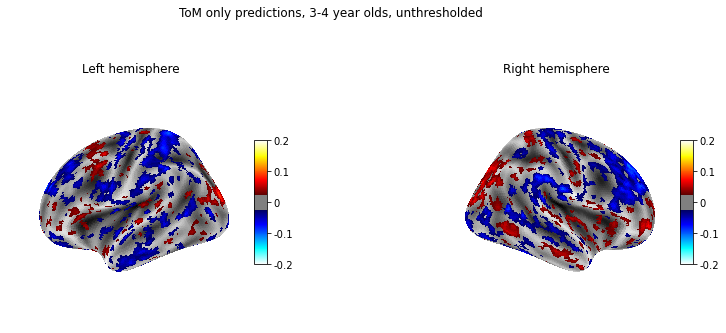

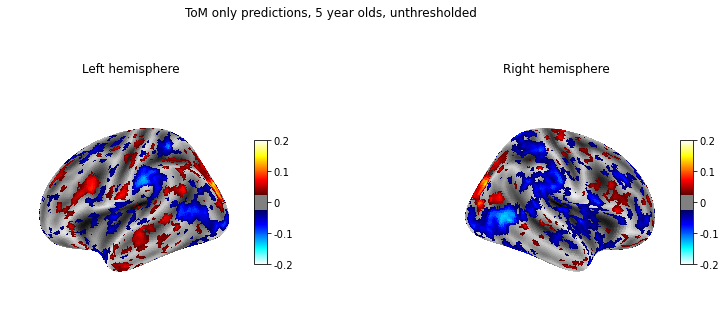

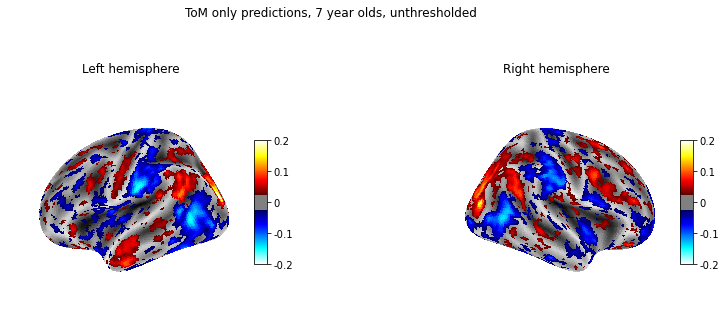

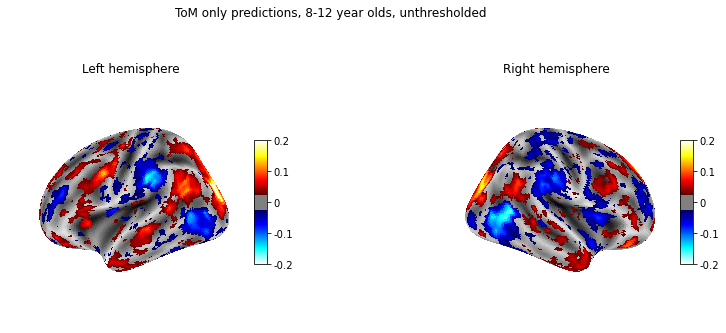

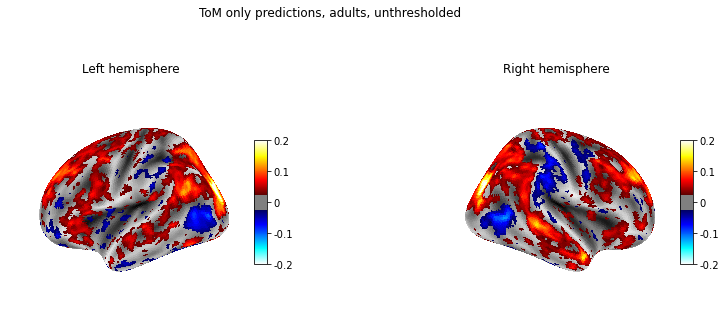

In [30]:
plot_lateral_only_with_vmax(vol=make_vol(np.mean(tom_predictions_34yrs, axis=0), group_mask),
                 title='ToM only predictions, 3-4 year olds, unthresholded', 
                 vis_threshold=0.025, vmax=0.2)

plot_lateral_only_with_vmax(vol=make_vol(np.mean(tom_predictions_5yrs, axis=0), group_mask),
                 title='ToM only predictions, 5 year olds, unthresholded', 
                 vis_threshold=0.025, vmax=0.2)

plot_lateral_only_with_vmax(vol=make_vol(np.mean(tom_predictions_7yrs, axis=0), group_mask),
                 title='ToM only predictions, 7 year olds, unthresholded', 
                 vis_threshold=0.025, vmax=0.2)

plot_lateral_only_with_vmax(vol=make_vol(np.mean(tom_predictions_812yrs, axis=0), group_mask),
                 title='ToM only predictions, 8-12 year olds, unthresholded', 
                 vis_threshold=0.025, vmax=0.2)

plot_lateral_only_with_vmax(vol=make_vol(np.mean(tom_predictions_adults, axis=0), group_mask),
                 title='ToM only predictions, adults, unthresholded', 
                 vis_threshold=0.025, vmax=0.2)

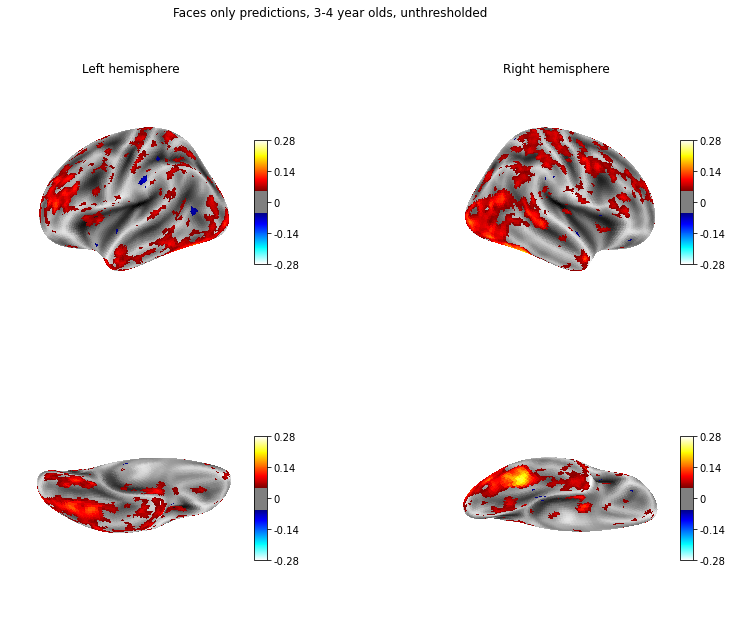

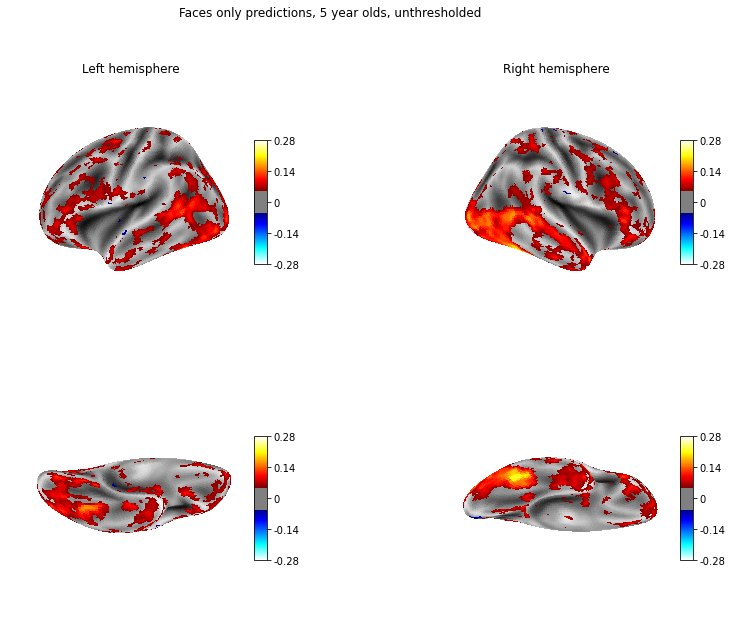

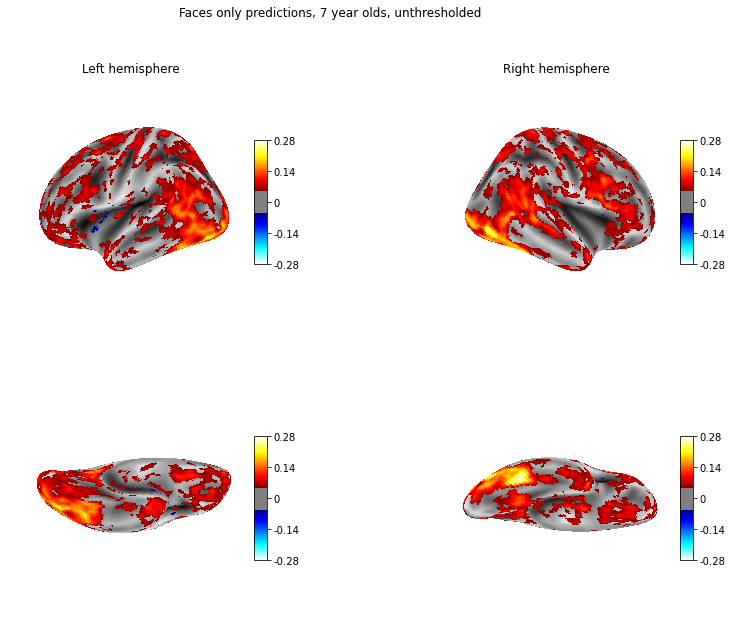

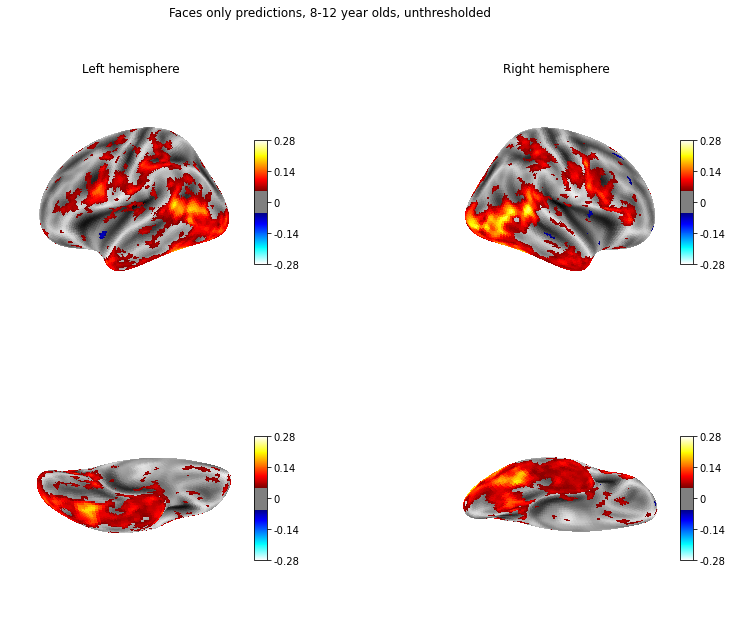

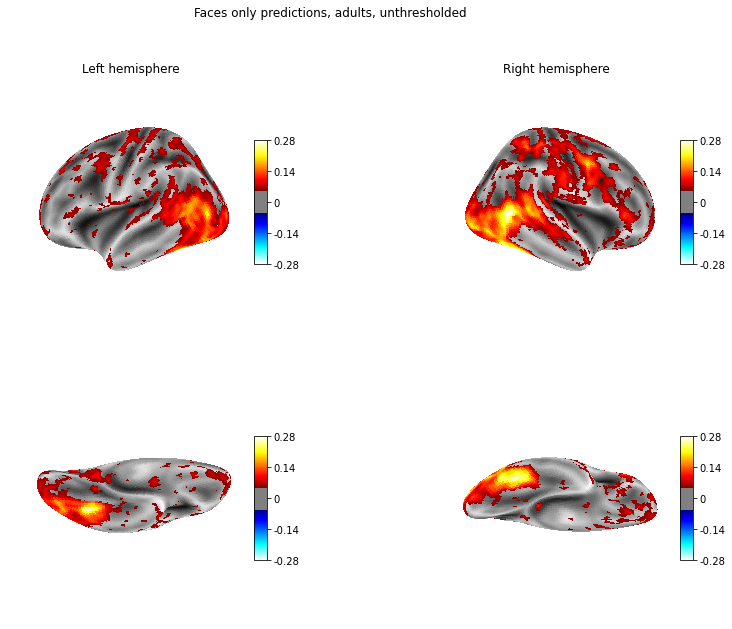

In [32]:
plot_surfaces_with_vmax(vol=make_vol(np.mean(faces_predictions_34yrs, axis=0), group_mask),
                 title='Faces only predictions, 3-4 year olds, unthresholded', 
                 vis_threshold=0.05, vmax=0.28)

plot_surfaces_with_vmax(vol=make_vol(np.mean(faces_predictions_5yrs, axis=0), group_mask),
                 title='Faces only predictions, 5 year olds, unthresholded', 
                 vis_threshold=0.05, vmax=0.28)

plot_surfaces_with_vmax(vol=make_vol(np.mean(faces_predictions_7yrs, axis=0), group_mask),
                 title='Faces only predictions, 7 year olds, unthresholded', 
                 vis_threshold=0.05, vmax=0.28)

plot_surfaces_with_vmax(vol=make_vol(np.mean(faces_predictions_812yrs, axis=0), group_mask),
                 title='Faces only predictions, 8-12 year olds, unthresholded', 
                 vis_threshold=0.05, vmax=0.28)

plot_surfaces_with_vmax(vol=make_vol(np.mean(faces_predictions_adults, axis=0), group_mask),
                 title='Faces only predictions, adults, unthresholded', 
                 vis_threshold=0.05, vmax=0.28)

<h2>Comparing rev corr and labeled ToM features</h2>

In [7]:
# Load features

social_features = np.load(os.path.join(directory, 'features', 'social_normalized.npy'))
rev_corr_features = np.load(os.path.join(directory, 'features', 'social_features_rev_corr_tom.npy'))
moten_features = np.load(os.path.join(directory, 'features', 'moten_reduced19.npy'))
combined_labeled = np.concatenate((social_features, moten_features), axis=1)
combined_rev_corr = np.concatenate((rev_corr_features, moten_features), axis=1)


# Split features
labeled_train, labeled_test = model_selection.train_test_split(combined_labeled, test_size=0.2, random_state=4)
rev_corr_train, rev_corr_test = model_selection.train_test_split(combined_rev_corr, test_size=0.2, random_state=4)

print('Labeled features test:', np.shape(labeled_test))
print('Rev corr features test:', np.shape(rev_corr_test))

Labeled features test: (31, 24)
Rev corr features test: (31, 24)


In [8]:
# Load bold data
bold_812yrs = np.load(os.path.join(directory, '8-12-yrs', '8-12-yrs_normalized_data_gm_mask.npy'))
print('8-12 year old BOLD data:', np.shape(bold_812yrs))

8-12 year old BOLD data: (34, 367709, 152)


In [9]:
# Load weights
labeled_weights_812yrs = np.load(os.path.join(directory, 
                                      '8-12-yrs', 
                                      'encoding_results', 
                                      'unthresholded', 
                                      '8-12-yrs_weights_gm_mask.npy'))
print('8-12 year old labeled weights:', np.shape(labeled_weights_812yrs))

rev_corr_weights_812yrs = np.load(os.path.join(directory, 
                                      '8-12-yrs', 
                                      'encoding_results', 
                                      'unthresholded', 
                                      '8-12-yrs_weights_gm_mask_rev_corr.npy'))
print('8-12 year old rev corr weights:', np.shape(rev_corr_weights_812yrs))

8-12 year old labeled weights: (34, 24, 367709)
8-12 year old rev corr weights: (34, 24, 367709)


In [10]:
# Get labeled predictions
labeled_tom_predictions_812yrs = get_feature_predictions(bold_data=bold_812yrs, 
                                                weights=labeled_weights_812yrs, 
                                                features_test=labeled_test, 
                                                feature_index=2)
print('8-12 year old ToM predictions:', np.shape(labeled_tom_predictions_812yrs))

8-12 year old ToM predictions: (34, 367709)


In [16]:
# Get rev corr predictions
rev_corr_tom_predictions_812yrs = get_feature_predictions(bold_data=bold_812yrs, 
                                                weights=rev_corr_weights_812yrs, 
                                                features_test=rev_corr_test, 
                                                feature_index=4)
print('8-12 year old rev corr ToM predictions:', np.shape(rev_corr_tom_predictions_812yrs))

8-12 year old rev corr ToM predictions: (34, 367709)


In [17]:
# Safety save
np.save(os.path.join(directory, '8-12-yrs', 'encoding_results', '8-12-yrs_labeled_tom_predictions.npy'), 
        labeled_tom_predictions_812yrs)

np.save(os.path.join(directory, '8-12-yrs', 'encoding_results', '8-12-yrs_rev_corr_tom_predictions.npy'), 
        rev_corr_tom_predictions_812yrs)

print('Saved successfully')

Saved successfully


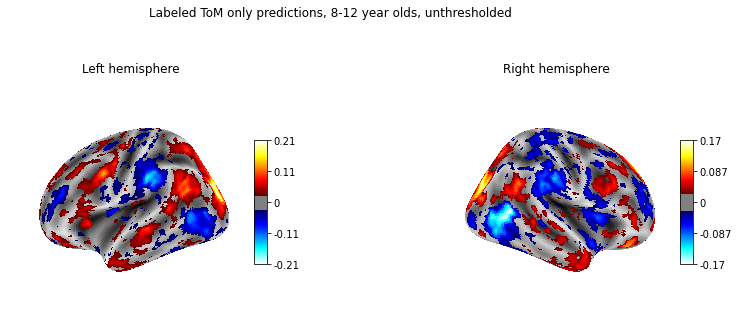

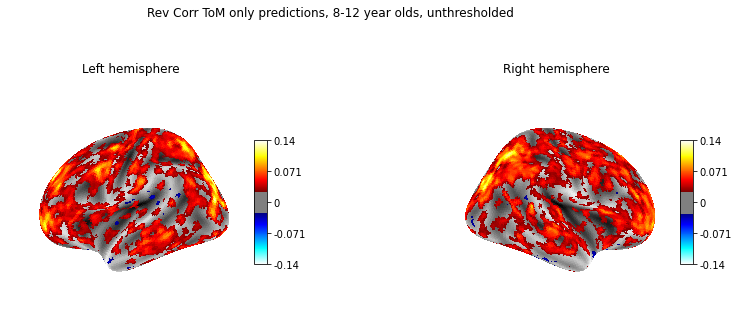

In [18]:
plot_lateral_only(vol=make_vol(np.mean(labeled_tom_predictions_812yrs, axis=0), group_mask),
                 title='Labeled ToM only predictions, 8-12 year olds, unthresholded', 
                 vis_threshold=0.025)

plot_lateral_only(vol=make_vol(np.mean(rev_corr_tom_predictions_812yrs, axis=0), group_mask),
                 title='Rev Corr ToM only predictions, 8-12 year olds, unthresholded', 
                 vis_threshold=0.025)